# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Nyoo Steven Christopher Handoko
- **Email:** m010d4ky2698@bangkit.academy
- **ID Dicoding:** nyoo_steven


## Menentukan Pertanyaan Bisnis


- Pertanyaan 1 : **Apakah dampak musim dan temperatur memengaruhi terhadap produktivitas Bike Sharing?**
- Pertanyaan 2 : **Apa dampak cuaca dan musim terhadap produktivitas berbagi sepeda?**
- Pertanyaan 3 : **Apakah tiap tahun Produktivitas Bike Sharing semakin meningkat?**
- Pertanyaan 4 : **Seberapa produktifnya Bike Sharing dalam 24 jam?**


## Import Semua Packages/Library yang Digunakan


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


In [5]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.duplicated().sum()

0

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.duplicated().sum()

0

In [11]:
print("Banyak hari yang sesuai: ",len(day_df['cnt']==day_df['casual']+day_df['registered']))
print("Banyak hari: ", len(day_df))

Banyak hari yang sesuai:  731
Banyak hari:  731


Ini sesuai dikarenakan banyak pengunjung di kolom `cnt` sama dengan banyak pengunjung `casual` + pengunjung `registered`


In [12]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])

In [13]:
aggregations = {'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}
for col in hour_df.columns:
    if col=='dteday':
        continue
    if col not in aggregations:
        aggregations[col] = 'mean'

new_tmp_df = hour_df.groupby('dteday').agg(aggregations).reset_index()

In [14]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
new_tmp_df.head()

,dteday,casual,registered,cnt,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,331,654,985,12.5,1.0,0.0,1.0,11.500000,0.0,6.0,0.0,1.583333,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,131,670,801,36.0,1.0,0.0,1.0,11.782609,0.0,0.0,0.0,1.956522,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,120,1229,1349,58.5,1.0,0.0,1.0,12.318182,0.0,1.0,1.0,1.000000,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,108,1454,1562,81.0,1.0,0.0,1.0,11.869565,0.0,2.0,1.0,1.043478,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,82,1518,1600,104.0,1.0,0.0,1.0,11.869565,0.0,3.0,1.0,1.000000,0.226957,0.229270,0.436957,0.186900


Perhatikan bahwa sebenarnya data `hour.csv` dengan `day.csv` memiliki nilai yang sama. Perbedaannya adalah `hour.csv` menampilkan keseluruhan 24 jam sedangkan `day.csv` merupakan rangkuman di hari tersebut.


### Cleaning Data


In [16]:
seasons = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(seasons)
hour_df['season'] = hour_df['season'].map(seasons)

In [17]:
tahun = {0:'2011', 1:'2012'}
day_df['yr'] = day_df['yr'].map(tahun)
hour_df['yr'] = hour_df['yr'].map(tahun)

In [18]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
day_df['mnth'] = day_df['mnth'].map(months)
hour_df['mnth'] = hour_df['mnth'].map(months)

In [19]:
day = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}
day_df['weekday'] = day_df['weekday'].map(day)
hour_df['weekday'] = hour_df['weekday'].map(day)

In [20]:
weather = {1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'}
day_df['weathersit'] = day_df['weathersit'].map(weather)
hour_df['weathersit'] = hour_df['weathersit'].map(weather)

In [21]:
day_df.value_counts('weathersit')

weathersit
clear         463
mist          247
light snow     21
dtype: int64

## Exploratory Data Analysis (EDA)


### Korelasi


/var/folders/r4/0k0b1gjs6fb50bj50gz514t00000gn/T/ipykernel_28831/3810293648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(), annot=True)


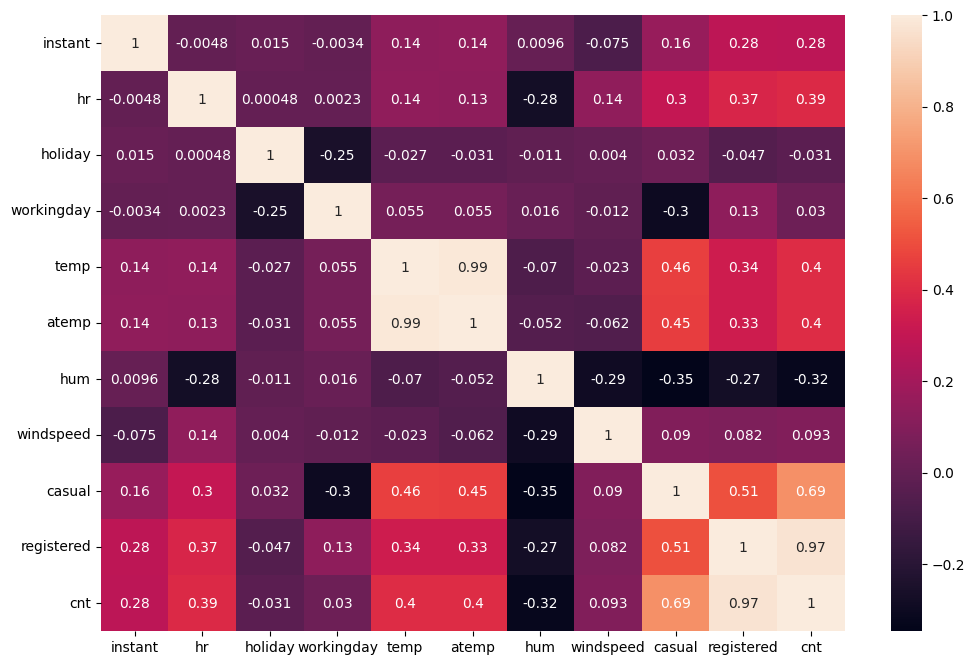

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(hour_df.corr(), annot=True)
plt.show()

Perhatikan bahwa terdapat beberapa kolom yang memiliki korelasi yang tinggi, salah satunya adalah kolom `registered` dengan `cnt`


### Explore day_df


In [23]:
day_df.describe(include="all")

/var/folders/r4/0k0b1gjs6fb50bj50gz514t00000gn/T/ipykernel_28831/282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,January,NaN,sunday,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [24]:
day_df['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

Terdapat 500 hari workingday dan 231 hari non-working day.


### Explore Pengunjung tiap Hour


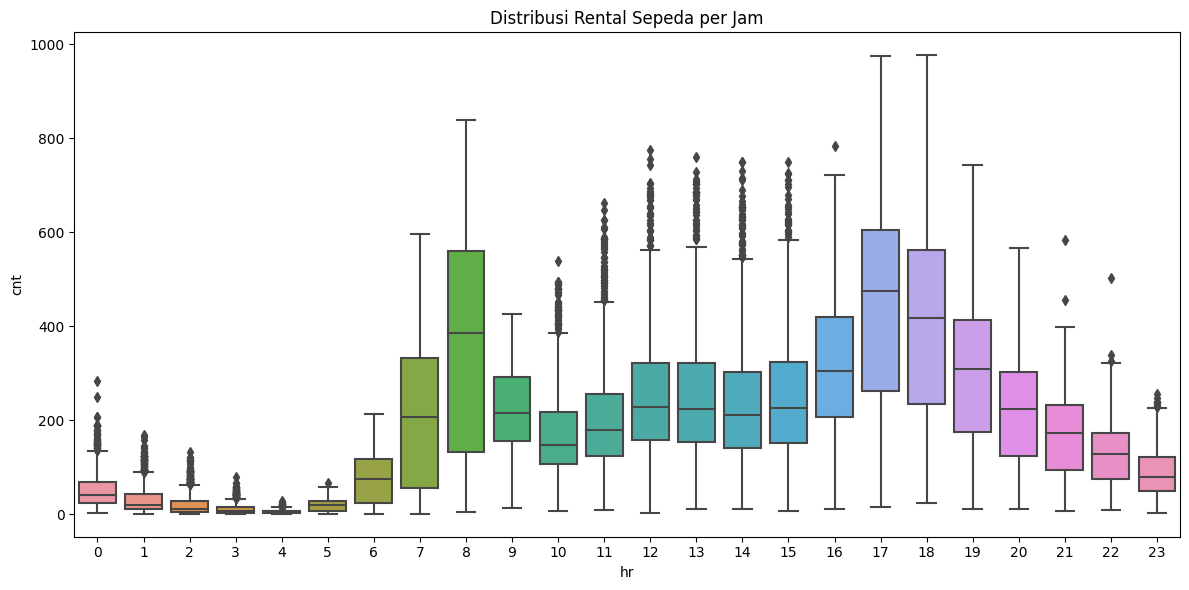

In [25]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Rental Sepeda per Jam')
for i in ax.containers:
    ax.bar_label(i,)

plt.tight_layout()
plt.show()

Pada akhir pekan atau saat hari libur, jumlah pengguna mulai meningkat sejak pukul 6.00 pagi dan terus meningkat hingga mencapai puncaknya pada pukul 13.00 siang. Setelah pukul 16.00, jumlah pengguna mulai turun hingga pukul 05.00 pagi berikutnya. Sementara pada hari kerja, terjadi peningkatan signifikan pada jumlah pengguna saat jam berangkat dan pulang kerja, yaitu mulai dari pukul 6.00 hingga 8.00 pagi dan kembali pada pukul 15.00 hingga 17.00 sore. Terjadi penurunan yang cukup mencolok pada pukul 9.00 pagi saat orang sudah aktif bekerja di kantor, dan juga di malam hari mulai dari pukul 19.00. Jumlah pengguna cenderung rendah dari tengah malam hingga pukul 05.00 pagi.


### Explore Working Day dan Non Working Day


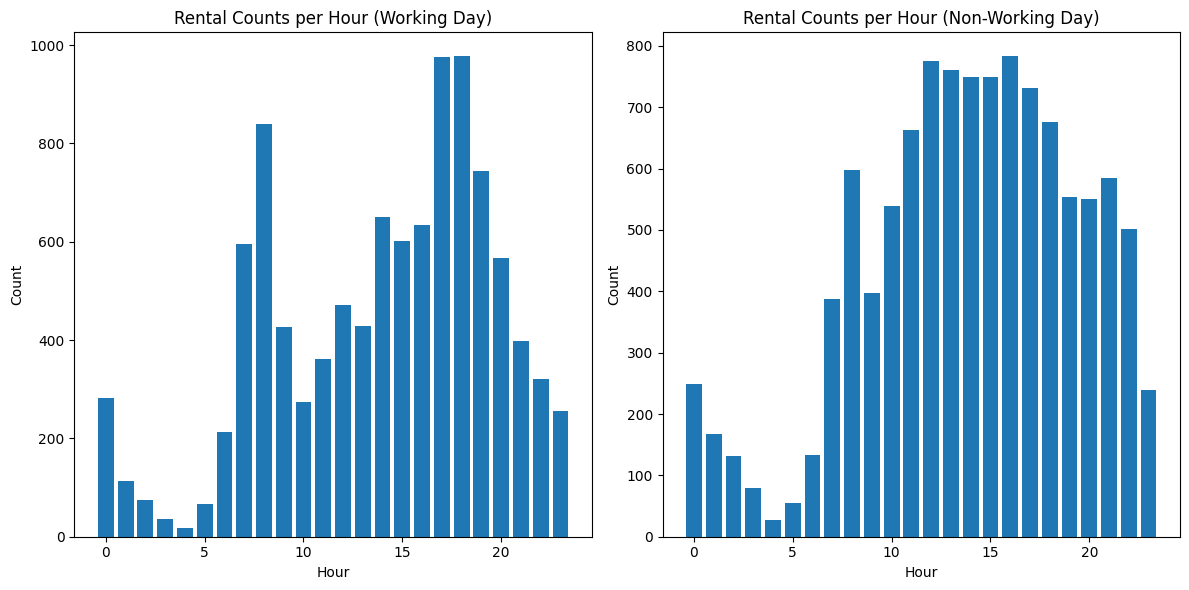

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

workingday_df = hour_df[hour_df['workingday'] == 1]
non_workingday_df = hour_df[hour_df['workingday'] == 0]

axes[0].bar(workingday_df['hr'], workingday_df['cnt'])
axes[0].set_title('Rental Counts per Hour (Working Day)')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

axes[1].bar(non_workingday_df['hr'], non_workingday_df['cnt'])
axes[1].set_title('Rental Counts per Hour (Non-Working Day)')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Visualization & Explanatory Analysis


### Pertanyaan 1: Apakah dampak musim dan temperatur memengaruhi terhadap produktivitas Bike Sharing?


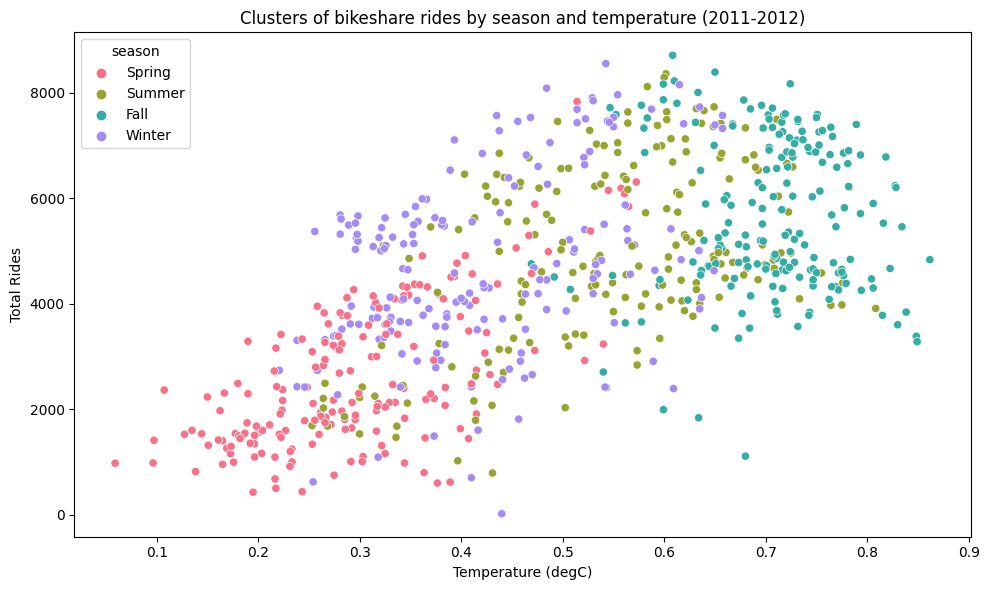

In [27]:
plt.figure(figsize=(10,6))

custom_palette = sns.color_palette("husl", 4)
sns.scatterplot(x='temp', y='cnt', data=day_df, hue='season', palette=custom_palette)

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

plt.tight_layout()
plt.show()

Ditemukan bahwa permintaan peminjaman sepeda mencapai titik terendah selama musim dingin. Selanjutnya, seiring dengan peningkatan suhu, permintaan untuk berbagi sepeda juga meningkat. Puncak permintaan terjadi pada musim panas, menandakan bahwa cuaca yang hangat menjadi faktor penting dalam meningkatkan penggunaan layanan berbagi sepeda. Lebih lanjut, terdapat rentang suhu yang lebih disukai oleh pengguna untuk bersepeda, yaitu antara 20 hingga 30 derajat Celcius. Rentang suhu ini terutama terjadi selama musim panas dan musim gugur, yang menunjukkan preferensi yang konsisten selama periode ini terhadap penggunaan sepeda.


### Pertanyaan 2: Apa dampak cuaca dan musim terhadap produktivitas berbagi sepeda?


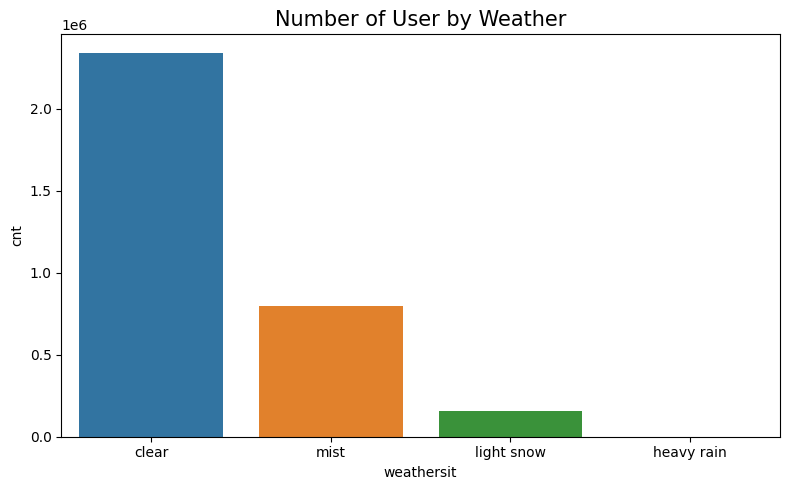

In [28]:
weather = hour_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(y="cnt", x="weathersit", data=weather)
plt.title('Number of User by Weather', fontsize=15)
plt.tight_layout()
plt.show()

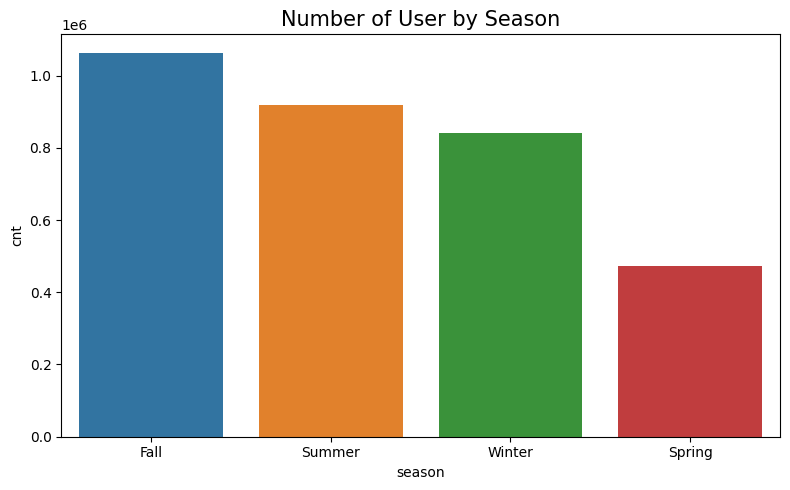

In [29]:
season = hour_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(y="cnt", x="season", data=season)
plt.title('Number of User by Season', fontsize=15)
plt.tight_layout()
plt.show()

Berdasarkan kondisi cuaca, berbagi sepeda memiliki produktivitas yang sangat tinggi selama cuaca cerah atau sedikit berawan dengan `2.338.173 pengguna`. Sementara pada saat hujan deras, badai, salju, atau kabut, produktivitas berbagi sepeda sangat rendah dengan hanya `223 pengguna`.

Ketika dilihat berdasarkan musim, produktivitas tertinggi terjadi pada musim gugur dengan total `1.061.129 pengguna`. Sementara produktivitas terendah terjadi pada musim semi dengan `471.348 pengguna`.


### Pertanyaan 3: Apakah tiap tahun Produktivitas Bike Sharing semakin meningkat?


/var/folders/r4/0k0b1gjs6fb50bj50gz514t00000gn/T/ipykernel_28831/2703948223.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(monthly_sum_2011['month_yr'].dt.strftime('%m_%Y'), rotation=45, ha='right')
/var/folders/r4/0k0b1gjs6fb50bj50gz514t00000gn/T/ipykernel_28831/2703948223.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(monthly_sum_2012['month_yr'].dt.strftime('%m_%Y'), rotation=45, ha='right')


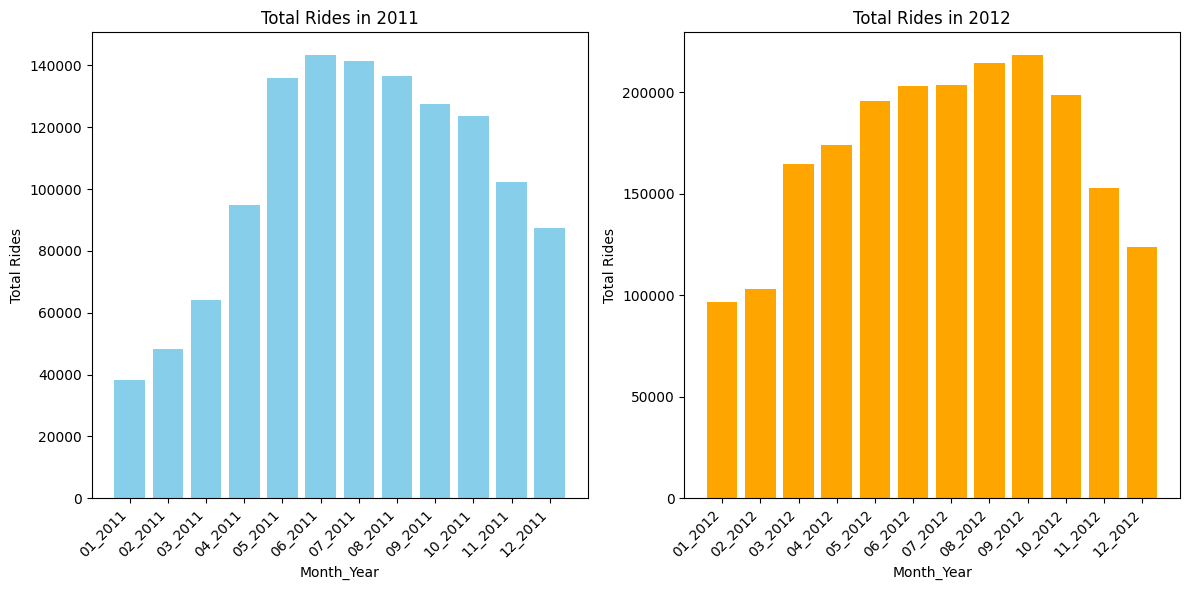

In [30]:
monthly_sum = day_df.groupby(['mnth', 'yr'])['cnt'].sum().reset_index()
monthly_sum['month_yr'] = pd.to_datetime(monthly_sum['yr'].astype(str) + '-' + monthly_sum['mnth'].astype(str))

monthly_sum = monthly_sum.sort_values('month_yr')
monthly_sum_2011 = monthly_sum[:12]
monthly_sum_2012 = monthly_sum[12:]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(monthly_sum_2011['month_yr'].dt.strftime('%m_%Y'), monthly_sum_2011['cnt'], color='skyblue')
axes[0].set_xlabel('Month_Year')
axes[0].set_ylabel('Total Rides')
axes[0].set_title('Total Rides in 2011')
axes[0].set_xticklabels(monthly_sum_2011['month_yr'].dt.strftime('%m_%Y'), rotation=45, ha='right')

axes[1].bar(monthly_sum_2012['month_yr'].dt.strftime('%m_%Y'), monthly_sum_2012['cnt'], color='orange')
axes[1].set_xlabel('Month_Year')
axes[1].set_ylabel('Total Rides')
axes[1].set_title('Total Rides in 2012')
axes[1].set_xticklabels(monthly_sum_2012['month_yr'].dt.strftime('%m_%Y'), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Diperhatikan bahwa dalam tahun 2012, penggunaan sepeda mengalami peningkatan dibandingkan dengan tahun sebelumnya. Selain itu, kita dapat melihat bahwa tren atau distribusi pada setiap bulan cenderung sama. Hal ini juga diperkuat dengan adanya peningkatan produktivitas sepeda yang signifikan sekitar bulan Juli hingga Oktober. Temuan ini konsisten dengan analisis sebelumnya yang menyatakan bahwa produktivitas cenderung meningkat pada musim gugur dan musim panas.


### Pertanyaan 4 : Seberapa produktifnya Bike Sharing dalam 24 jam?


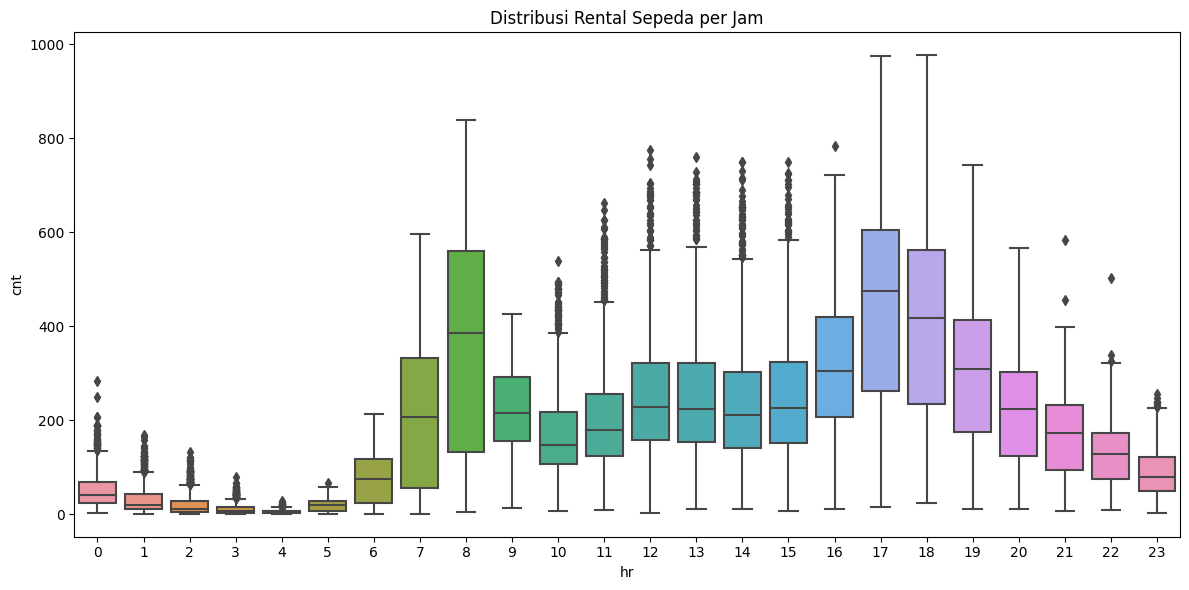

In [31]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Rental Sepeda per Jam')
for i in ax.containers:
    ax.bar_label(i,)

plt.tight_layout()
plt.show()

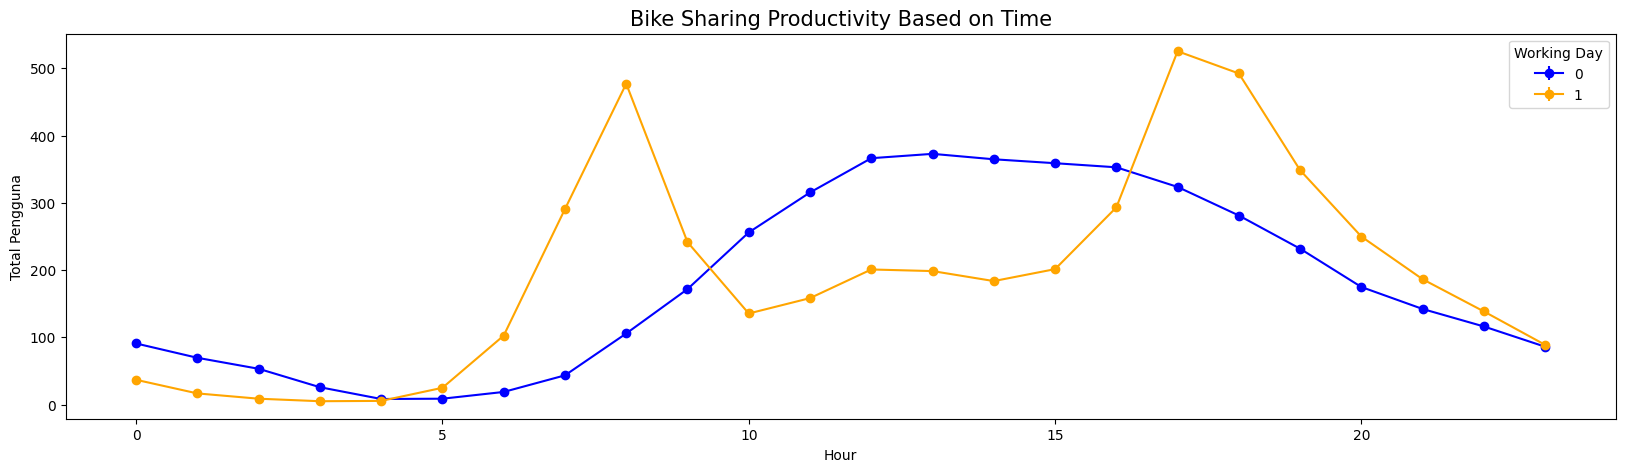

In [32]:
plt.figure(figsize=(20, 5))
for day_type, color in zip(hour_df['workingday'].unique(), ['blue', 'orange']):
    subset = hour_df[hour_df['workingday'] == day_type]
    plt.errorbar(subset.groupby('hr')['cnt'].mean().index, 
                 subset.groupby('hr')['cnt'].mean().values,
                 yerr=subset.groupby('hr')['cnt'].std().values / len(subset), 
                 fmt='-o', label=day_type, color=color)

plt.title('Bike Sharing Productivity Based on Time', fontsize=15)
plt.xlabel('Hour')
plt.ylabel('Total Pengguna')
plt.legend(title='Working Day')
plt.show()

Pada akhir pekan atau saat hari libur, jumlah pengguna mulai meningkat sejak pukul 6.00 pagi dan terus meningkat hingga mencapai puncaknya pada pukul 13.00 siang. Setelah pukul 16.00, jumlah pengguna mulai turun hingga pukul 05.00 pagi berikutnya. Sementara pada hari kerja, terjadi peningkatan signifikan pada jumlah pengguna saat jam berangkat dan pulang kerja, yaitu mulai dari pukul 6.00 hingga 8.00 pagi dan kembali pada pukul 15.00 hingga 17.00 sore. Terjadi penurunan yang cukup mencolok pada pukul 9.00 pagi saat orang sudah aktif bekerja di kantor, dan juga di malam hari mulai dari pukul 19.00. Jumlah pengguna cenderung rendah dari tengah malam hingga pukul 05.00 pagi.


### RMF Analysis


In [33]:
rfm_df = day_df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max", 
    "instant": "nunique", 
    "cnt": "sum" 
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


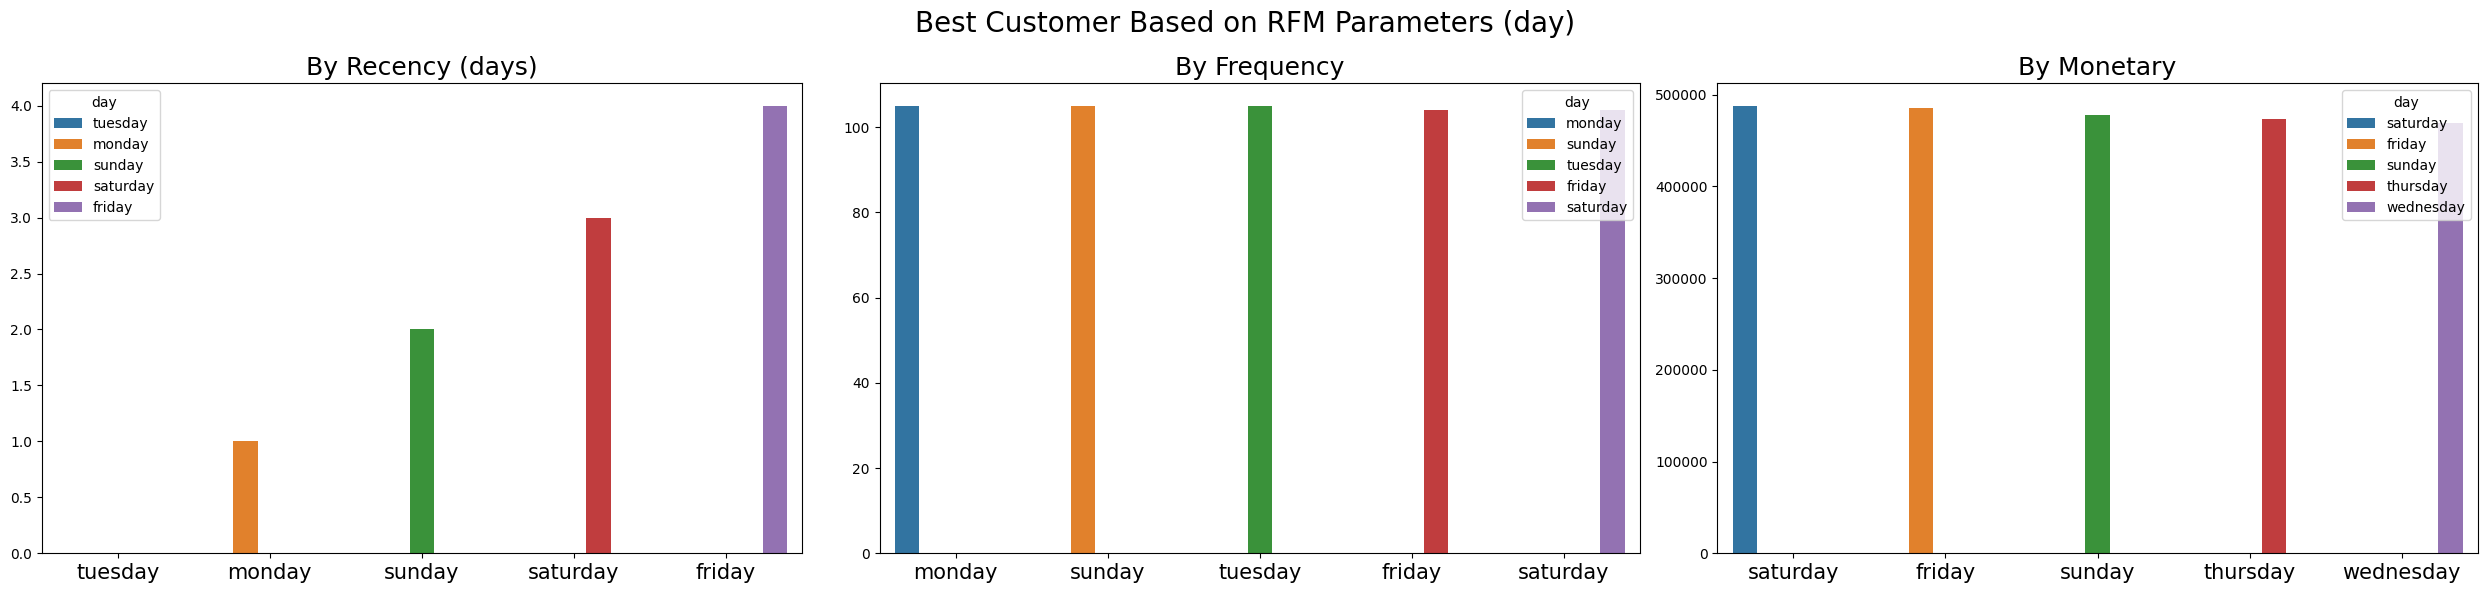

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5),  hue="day", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5),  hue="day", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5),  hue="day", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)

plt.tight_layout()
plt.show()

## Conclusion


- Musim panas menunjukkan permintaan tertinggi untuk layanan berbagi sepeda, sementara musim dingin memiliki permintaan terendah, menunjukkan bahwa cuaca hangat menjadi faktor kunci dalam menggerakkan penggunaan sepeda.
- Berdasarkan analisis, terlihat bahwa cuaca yang cerah atau sedikit berawan mendukung produktivitas tinggi dalam layanan berbagi sepeda, sementara kondisi cuaca yang buruk seperti hujan deras atau badai mengakibatkan produktivitas yang rendah. Selain itu, musim gugur menunjukkan tingkat produktivitas tertinggi, sementara musim semi memiliki produktivitas terendah.
- Peningkatan penggunaan sepeda terjadi pada tahun 2012 dibandingkan dengan tahun sebelumnya, dengan tren atau pola yang konsisten setiap bulannya, terutama dengan peningkatan signifikan dari bulan Juli hingga Oktober. Hal ini mendukung temuan sebelumnya bahwa produktivitas cenderung meningkat selama musim gugur dan musim panas.
- Terjadi lonjakan pengguna sepeda pada akhir pekan, terutama antara pukul 6.00 pagi dan 13.00 siang, sedangkan pada hari kerja, lonjakan terjadi saat jam berangkat dan pulang kerja, antara pukul 6.00 hingga 8.00 pagi dan kembali pada pukul 15.00 hingga 17.00 sore, dengan penurunan pada pukul 9.00 pagi dan setelah pukul 19.00 hingga dini hari.
